In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teams = pd.read_csv("data/Men ODI Team Batting Stats.csv")

In [3]:
teams.head(3)

,Country,Team Matches Played,Matches Won,Matches Lost,Matches Tied,Matches With No Result,Win/Loss Ratio,Avg Runs Per Wicket Batting,Avg Runs Per Six Balls Batting,Number Of Team Innings Batting,Highest Team Score Batting,Lowest Completed Score Batting
0,England,746,375,334,9,28,1.122,31.10,4.91,738,481,86
1,Australia,949,575,331,9,34,1.737,34.14,5.01,939,434,70
2,South Africa,625,385,216,6,18,1.782,35.76,5.11,622,439,69


In [4]:
teams.columns

Index(['Country', 'Team Matches Played', 'Matches Won', 'Matches Lost',
       'Matches Tied', 'Matches With No Result', 'Win/Loss Ratio',
       'Avg Runs Per Wicket Batting', 'Avg Runs Per Six Balls Batting',
       'Number Of Team Innings Batting', 'Highest Team Score Batting',
       'Lowest Completed Score Batting'],
      dtype='object')

In [5]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         17 non-null     object 
 1   Team Matches Played             17 non-null     int64  
 2   Matches Won                     17 non-null     int64  
 3   Matches Lost                    17 non-null     int64  
 4   Matches Tied                    17 non-null     int64  
 5   Matches With No Result          17 non-null     int64  
 6   Win/Loss Ratio                  17 non-null     float64
 7   Avg Runs Per Wicket Batting     17 non-null     float64
 8   Avg Runs Per Six Balls Batting  17 non-null     float64
 9   Number Of Team Innings Batting  17 non-null     int64  
 10  Highest Team Score Batting      17 non-null     int64  
 11  Lowest Completed Score Batting  17 non-null     int64  
dtypes: float64(3), int64(8), object(1)
mem

In [6]:
teams.describe().T

,count,mean,std,min,25%,50%,75%,max
Team Matches Played,17.0,486.176471,367.997492,14.00,126.000,529.000,822.000,987.000
Matches Won,17.0,234.941176,203.680040,5.00,42.000,138.000,389.000,575.000
Matches Lost,17.0,229.647059,160.041378,9.00,66.000,241.000,374.000,424.000
Matches Tied,17.0,4.470588,3.858718,0.00,1.000,5.000,8.000,10.000
Matches With No Result,17.0,17.117647,14.886581,0.00,5.000,11.000,30.000,41.000
Win/Loss Ratio,17.0,0.891412,0.437226,0.25,0.555,0.923,1.122,1.782
Avg Runs Per Wicket Batting,17.0,28.010588,4.254516,21.66,25.380,26.890,30.650,35.760
Avg Runs Per Six Balls Batting,17.0,4.711765,0.273844,4.10,4.540,4.780,4.910,5.110
Number Of Team Innings Batting,17.0,480.705882,363.980385,14.00,125.000,525.000,811.000,975.000
Highest Team Score Batting,17.0,375.882353,55.576392,275.00,333.000,371.000,418.000,481.000


In [7]:
# Missing Data

teams.isna().sum()

Country                           0
Team Matches Played               0
Matches Won                       0
Matches Lost                      0
Matches Tied                      0
Matches With No Result            0
Win/Loss Ratio                    0
Avg Runs Per Wicket Batting       0
Avg Runs Per Six Balls Batting    0
Number Of Team Innings Batting    0
Highest Team Score Batting        0
Lowest Completed Score Batting    0
dtype: int64

## Exploratory Data Analysis

##### How many teams are present in the dataset?

In [8]:
count_teams = teams.Country.nunique()
print(f"Number of Teams in the Dataset are : {count_teams}")

Number of Teams in the Dataset are : 17


##### What is the distribution of matches won, lost, tied, and with no result?

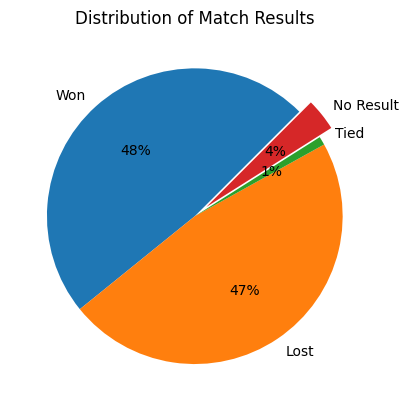

In [9]:
matches_won = teams['Matches Won'].sum()
matches_lost = teams['Matches Lost'].sum()
matches_tied = teams['Matches Tied'].sum()
matches_with_NR = teams['Matches With No Result'].sum()

total_matches = matches_won + matches_lost + matches_tied + matches_with_NR

# Create Pie Chart

plt.pie([matches_won,matches_lost,matches_tied,matches_with_NR],labels = ['Won','Lost','Tied','No Result'],autopct="%1.0f%%",explode=[0,0,0,0.1],startangle=45)
plt.title("Distribution of Match Results")
plt.show()

#### Which team has the highest win/loss ratio?

In [10]:
winloss_country = teams.loc[teams['Win/Loss Ratio'].idxmax()]['Country']
print("Cricket Team with highest Win/Loss Ratio is {}".format(winloss_country))

Cricket Team with highest Win/Loss Ratio is South Africa


#### What is the average runs scored per wicket and per six balls?

In [11]:
avg_runs_wicket = teams['Avg Runs Per Wicket Batting'].mean()
avg_runs_6balls = teams['Avg Runs Per Six Balls Batting'].mean()

print(f"The Average runs Scored per Wicket are : {avg_runs_wicket}")
print(f"The Average Runs scored per Six Balls are : {avg_runs_6balls}")

The Average runs Scored per Wicket are : 28.01058823529412
The Average Runs scored per Six Balls are : 4.711764705882353


#### How does the number of team innings vary across teams?

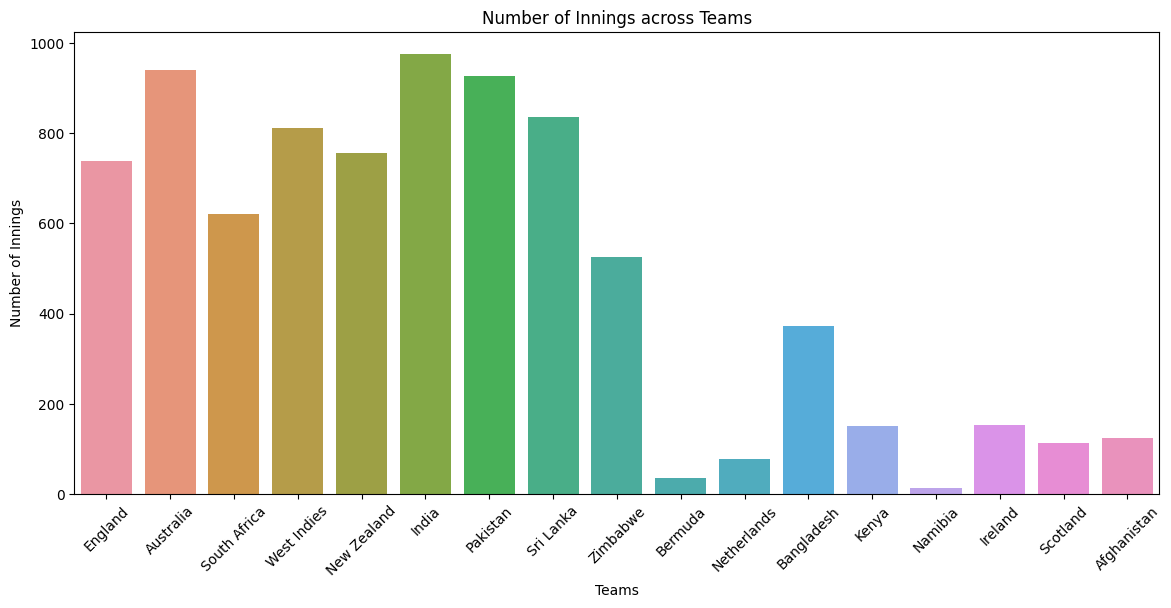

In [17]:
plt.figure(figsize=(14,6))
sns.barplot(data=teams,x='Country',y='Number Of Team Innings Batting')
plt.title("Number of Innings across Teams")
plt.xlabel("Teams")
plt.ylabel("Number of Innings")
plt.xticks(rotation=45)
plt.show()